In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd /gdrive/MyDrive/summer_rating

/gdrive/MyDrive/summer_rating


In [4]:
ls

summer-products-with-rating-and-performance_2020-08.csv


# Importing Libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [7]:
df_train=pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
df_train.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [9]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.000000,1573.000000,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,95.735602,0.105531,0.018436,0.074380,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.000000,26495.832804,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,214.075544,0.340709,0.134565,0.262472,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.000000,78474.455607,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.000000,0.000000,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.000000,1987.000000,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,20.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.000000,7936.000000,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,94.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.000000,24564.000000,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,2789.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.000000,2174765.000000,5.000000,1.000000


# EDA

In [32]:
df_train.isna().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [11]:
df_train.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [24]:
df_train.units_sold.value_counts()

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
2           2
3           2
6           1
Name: units_sold, dtype: int64

In [14]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [15]:
binary_cols

['uses_ad_boosts',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'shipping_is_express',
 'urgency_text',
 'merchant_has_profile_picture']

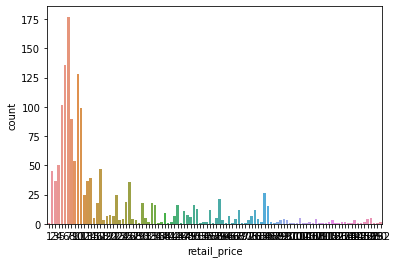

In [17]:
sns.countplot("retail_price", data=df_train)

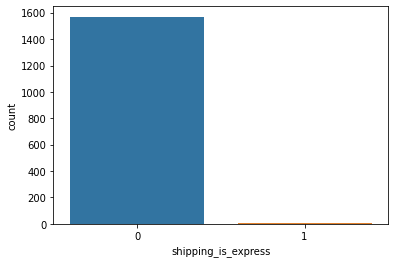

In [18]:
sns.countplot("shipping_is_express", data=df_train)

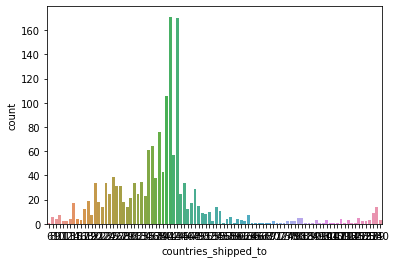

In [19]:
sns.countplot("countries_shipped_to", data=df_train)

In [ ]:
Location_numeric = {'No':1,'Yes':0}
df_train.Location.replace(Location_numeric, inplace=True)

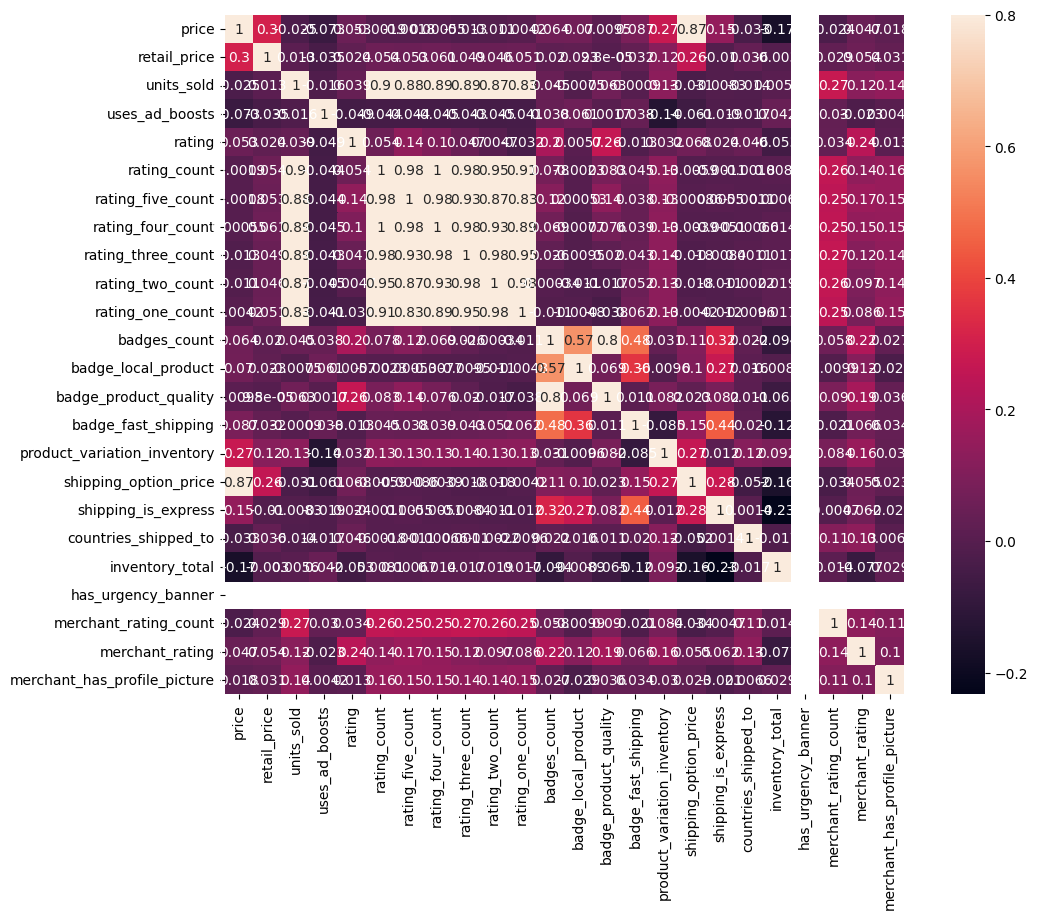

In [20]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

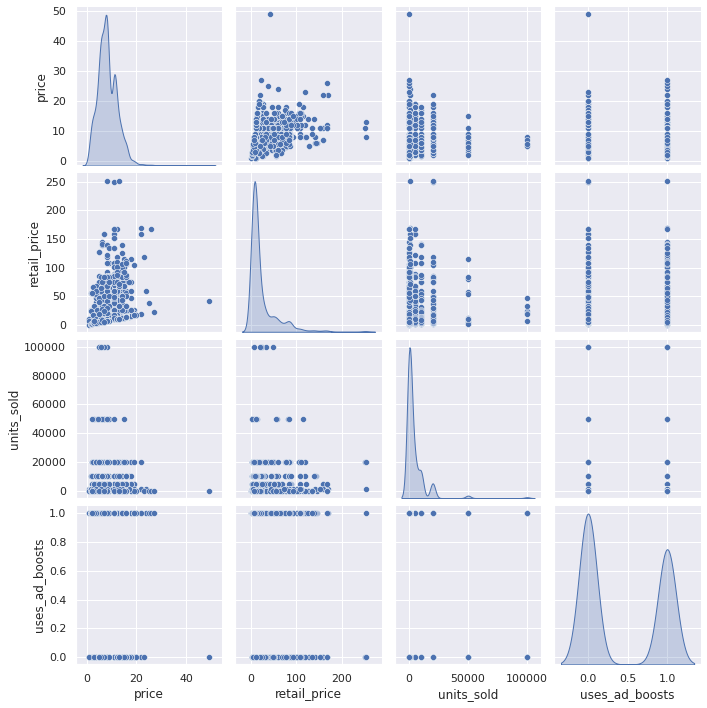

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [33]:

X = df_train.drop(['title', 'title_orig','currency_buyer','tags', 'product_color', 'product_variation_size_id','shipping_option_name', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name','rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count','has_urgency_banner', 
       'merchant_info_subtitle','merchant_id','merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month','units_sold'], axis = 1)
Y = df_train["units_sold"]
x_Data = X.values
y_Data = Y.values

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [38]:
model.score(X_test,y_test)

0.653968253968254

In [39]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.6468254  0.64285714 0.69047619 0.61752988 0.65737052]


In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [41]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.6669316375198728

In [42]:
confusion_matrix(y_train, pred)

array([[  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 10,   1,   0,   0,   1,   5,  23,   1,   1,   0,   0,   0,   0,
          0,   0],
       [  8,   1,   0,   0,   1,   4,  23,  15,  10,   0,   0,   0,   0,
          0,   0],
       [ 12,   3,   0,   0,   1,   3,  23,  28, 297,  23,   4,   3,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,  48, 239,  28,   0,   2,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,  48, 112,  13,   3,
       

In [43]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [44]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [45]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          10       0.25      0.43      0.32         7
          50       0.33      0.29      0.31        14
         100       0.86      0.78      0.82       111
        1000       0.74      0.76      0.75        87
        5000       0.46      0.53      0.49        40
       10000       0.52      0.41      0.46        34
       20000       0.64      0.44      0.52        16
       50000       1.00      0.67      0.80         3
      100000       1.00      1.00      1.00         2

    accuracy                           0.65       315
   macro avg       0.41      0.38      0.39       315
weighted avg       0.69      0.65      0.67       315



In [46]:
cma = confusion_matrix(y_test, predicted_test)

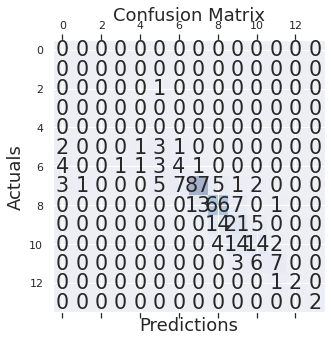

In [47]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier as rf

In [49]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [50]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.9372019077901431

In [51]:
confusion_matrix(y_train, pred)

array([[  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  41,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  52,  10,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 394,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  14, 301,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,  17, 158,   1,   0,
       

In [52]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [53]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [54]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
          10       0.44      0.57      0.50         7
          50       0.88      0.50      0.64        14
         100       0.85      0.94      0.89       111
        1000       0.79      0.84      0.82        87
        5000       0.55      0.45      0.49        40
       10000       0.56      0.59      0.57        34
       20000       0.53      0.50      0.52        16
       50000       0.00      0.00      0.00         3
      100000       0.00      0.00      0.00         2

    accuracy                           0.74       315
   macro avg       0.46      0.44      0.44       315
weighted avg       0.72      0.74      0.73       315



In [55]:
cma = confusion_matrix(y_test, pred_test)

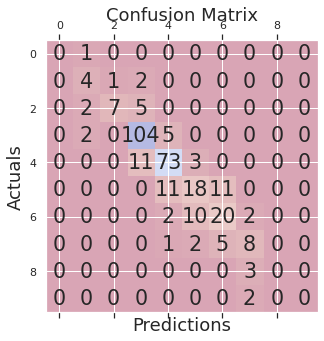

In [56]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [57]:
from sklearn import tree

In [58]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [59]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [60]:
confusion_matrix(y_train, pred1)

array([[  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  42,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  62,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 398,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 318,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 177,   0,   0,
       

In [61]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [62]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
          10       0.45      0.71      0.56         7
          50       0.53      0.64      0.58        14
         100       0.85      0.82      0.83       111
        1000       0.77      0.72      0.75        87
        5000       0.52      0.55      0.54        40
       10000       0.56      0.59      0.57        34
       20000       0.50      0.38      0.43        16
       50000       0.33      0.67      0.44         3
      100000       1.00      0.50      0.67         2

    accuracy                           0.70       315
   macro avg       0.50      0.51      0.49       315
weighted avg       0.71      0.70      0.70       315



In [63]:
cma = confusion_matrix(y_test, pred1_test)

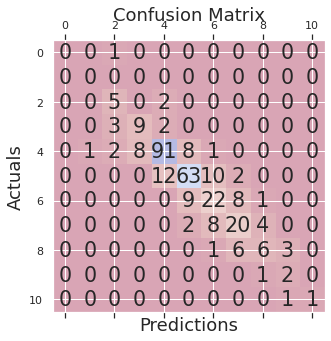

In [64]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [66]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.24483306836248012

In [67]:
confusion_matrix(y_train, pred_LR)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  42,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51,  11,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 154, 151,  32,  31,  30,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  18,  48,   6, 123, 123,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   0,  48, 115,
       

In [68]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [69]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         7
          50       0.00      0.00      0.00        14
         100       0.59      0.32      0.42       111
        1000       0.20      0.16      0.18        87
        5000       0.00      0.00      0.00        40
       10000       0.08      0.18      0.11        34
       20000       0.12      0.75      0.21        16
       50000       0.00      0.00      0.00         3
      100000       0.00      0.00      0.00         2

    accuracy                           0.22       315
   macro avg       0.10      0.14      0.09       315
weighted avg       0.28      0.22      0.22       315



In [70]:
cma = confusion_matrix(y_test, pred_LR_test)

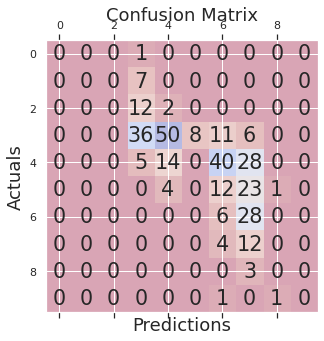

In [71]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [72]:
from sklearn.neural_network import MLPClassifier

In [73]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [74]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.02066772655007949

In [75]:
confusion_matrix(y_train, pred_NN)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   4],
       [  0,   0,   0,   0,   0,   0,   0,  15,   0,   0,   0,   0,   0,
          0,  27],
       [  4,   0,   0,   0,   0,   0,   0,  22,   0,   0,   0,   0,   0,
          0,  36],
       [ 10,   0,   0,   0,   0,   0,   0,  40,   0,   0,   0,   0,   0,
          0, 348],
       [  1,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0, 316],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       

In [76]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [77]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         7
          50       0.21      0.29      0.24        14
         100       0.00      0.00      0.00       111
        1000       0.00      0.00      0.00        87
        5000       0.00      0.00      0.00        40
       10000       0.00      0.00      0.00        34
       20000       0.00      0.00      0.00        16
       50000       0.00      0.00      0.00         3
      100000       0.01      1.00      0.01         2

    accuracy                           0.02       315
   macro avg       0.02      0.12      0.02       315
weighted avg       0.01      0.02      0.01       315



In [78]:
cma = confusion_matrix(y_test, pred_NN_test)

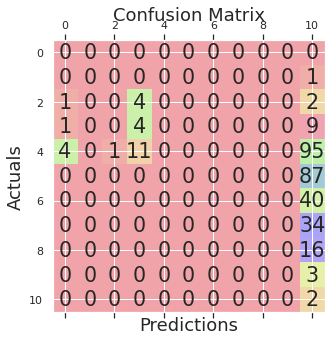

In [79]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [80]:
import xgboost as xgb

In [81]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [82]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

0.9062003179650239

In [83]:
confusion_matrix(y_train, pred_XGB)

array([[  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  39,   0,   3,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  56,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 394,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  27, 276,  15,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,  27, 143,   6,   0,
       

In [84]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [85]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
          10       0.50      0.71      0.59         7
          50       0.64      0.64      0.64        14
         100       0.86      0.88      0.87       111
        1000       0.78      0.79      0.79        87
        5000       0.52      0.42      0.47        40
       10000       0.58      0.65      0.61        34
       20000       0.60      0.56      0.58        16
       50000       1.00      0.67      0.80         3
      100000       1.00      0.50      0.67         2

    accuracy                           0.74       315
   macro avg       0.65      0.58      0.60       315
weighted avg       0.73      0.74      0.73       315



In [86]:
cma = confusion_matrix(y_test, pred_XGB_test)

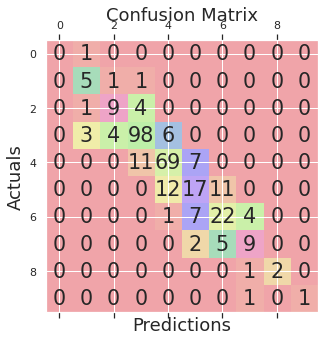

In [87]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

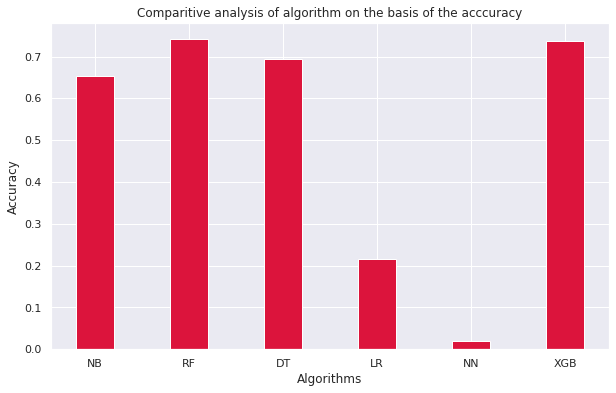

In [88]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


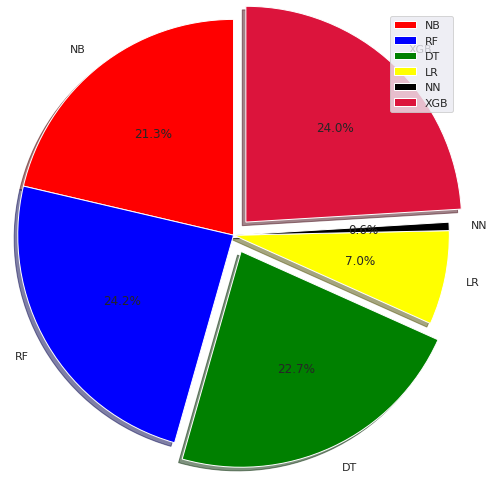

In [93]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0,0.1),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [94]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']